# Univ.AI - Hackathon 1.1

* The problem at hand is of "Supervised Binary Classification Problem"

## Importing Necessary Libraries & Packages

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_recall_curve, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, auc, plot_confusion_matrix

import regex as re

## Load Data

In [18]:
data_train = pd.read_csv('Data/Training Data.csv')
data_test = pd.read_csv('Data/Test Data.csv')

In [19]:
data_train.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


## Exploratory Data Analysis

In [20]:
# Numerical Data Description
data_train.describe().round(2)

,Id,income,age,experience,current_job_years,current_house_years,risk_flag
count,252000.00,252000.00,252000.00,252000.00,252000.00,252000.0,252000.00
mean,126000.50,4997116.67,49.95,10.08,6.33,12.0,0.12
std,72746.28,2878311.01,17.06,6.00,3.65,1.4,0.33
min,1.00,10310.00,21.00,0.00,0.00,10.0,0.00
25%,63000.75,2503015.00,35.00,5.00,3.00,11.0,0.00
50%,126000.50,5000694.50,50.00,10.00,6.00,12.0,0.00
75%,189000.25,7477502.00,65.00,15.00,9.00,13.0,0.00
max,252000.00,9999938.00,79.00,20.00,14.00,14.0,1.00


In [21]:
# Categorical Data Description
data_train.describe(include=[np.object])

/var/folders/rv/k51kjvz57zzfclt215sqbqn80000gn/T/ipykernel_44296/874052279.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_train.describe(include=[np.object])


,married,house_ownership,car_ownership,profession,city,state
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


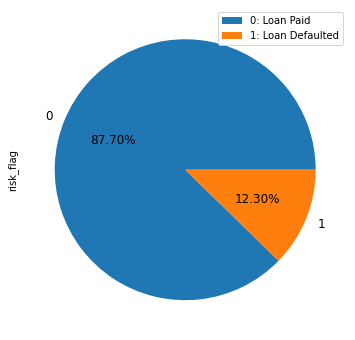

In [22]:
data_train.risk_flag.value_counts().plot(kind='pie', autopct='%1.2f%%', legend=True, fontsize=12, figsize=(14,6), textprops={'color':"black"})
plt.legend(["0: Loan Paid", "1: Loan Defaulted"])
plt.show()

* This points out to the fact that are data is unbalanced in terms of the two classification sets

In [23]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Id                   252000 non-null  int64 
 1   income               252000 non-null  int64 
 2   age                  252000 non-null  int64 
 3   experience           252000 non-null  int64 
 4   married              252000 non-null  object
 5   house_ownership      252000 non-null  object
 6   car_ownership        252000 non-null  object
 7   profession           252000 non-null  object
 8   city                 252000 non-null  object
 9   state                252000 non-null  object
 10  current_job_years    252000 non-null  int64 
 11  current_house_years  252000 non-null  int64 
 12  risk_flag            252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


* There are no null values in the entire dataset for any of the features.
* Most object features can be converted to categorical, numerical datatypes using LabelEncoding

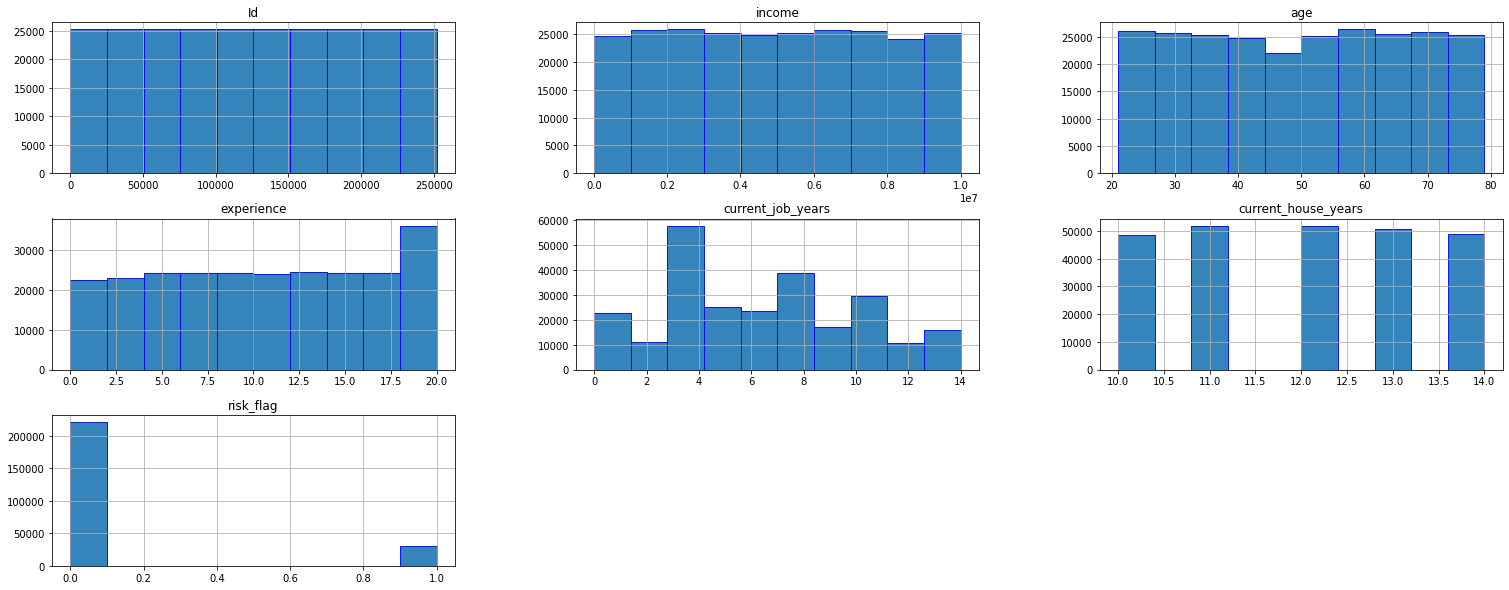

In [24]:
data_train.hist(figsize=(26,10), bins=10, ec='b', alpha=0.9, grid=True)
plt.show()

* We should also see this kind of a distribution for the categorical variables

In [25]:
data_train

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


<AxesSubplot:xlabel='married', ylabel='income'>

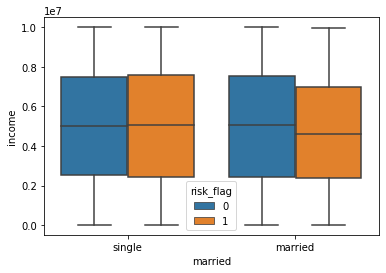

In [26]:
sns.boxplot(x='married', y='income', data=data_train, hue='risk_flag')

In [28]:
# sns.pairplot(data=data_train.loc[:,['income', 'age','risk_flag']], kind='reg', hue='risk_flag')

<AxesSubplot:>

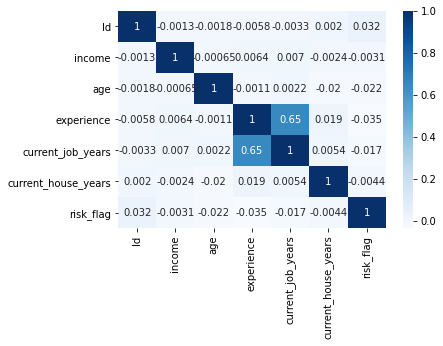

In [29]:
data_corr = data_train.corr()
sns.heatmap(data_corr, annot=True, cmap='Blues')

## Data Cleaning

In [31]:
data_train

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [32]:
data_train['house_ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: house_ownership, dtype: int64

In [33]:
data_train['car_ownership'].value_counts()

no     176000
yes     76000
Name: car_ownership, dtype: int64

In [34]:
len(data_train['profession'].unique())

51

In [35]:
a = data_train['city'].unique()
a.sort()
a

array(['Adoni', 'Agartala', 'Agra', 'Ahmedabad', 'Ahmednagar', 'Aizawl',
       'Ajmer', 'Akola', 'Alappuzha', 'Aligarh', 'Allahabad', 'Alwar',
       'Amaravati', 'Ambala', 'Ambarnath', 'Ambattur', 'Amravati',
       'Amritsar', 'Amroha', 'Anand', 'Anantapur', 'Anantapuram[24]',
       'Arrah', 'Asansol', 'Aurangabad', 'Aurangabad[39]', 'Avadi',
       'Bahraich', 'Ballia', 'Bally', 'Bangalore', 'Baranagar', 'Barasat',
       'Bardhaman', 'Bareilly', 'Bathinda', 'Begusarai', 'Belgaum',
       'Bellary', 'Berhampore', 'Berhampur', 'Bettiah[33]', 'Bhagalpur',
       'Bhalswa_Jahangir_Pur', 'Bharatpur', 'Bhatpara', 'Bhavnagar',
       'Bhilai', 'Bhilwara', 'Bhimavaram', 'Bhind', 'Bhiwandi', 'Bhiwani',
       'Bhopal', 'Bhubaneswar', 'Bhusawal', 'Bidar', 'Bidhannagar',
       'Bihar_Sharif', 'Bijapur', 'Bikaner', 'Bilaspur', 'Bokaro',
       'Bongaigaon', 'Bulandshahr', 'Burhanpur', 'Buxar[37]',
       'Chandigarh_city', 'Chandrapur', 'Chapra', 'Chennai', 'Chinsurah',
       'Chittoor[28]

In [36]:
a = data_train['state'].unique()
a.sort()
a

array(['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Delhi', 'Gujarat', 'Haryana', 'Himachal_Pradesh',
       'Jammu_and_Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya_Pradesh', 'Maharashtra', 'Manipur', 'Mizoram', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil_Nadu',
       'Telangana', 'Tripura', 'Uttar_Pradesh', 'Uttar_Pradesh[5]',
       'Uttarakhand', 'West_Bengal'], dtype=object)

In [37]:
le = LabelEncoder()
data_train['married_cat'] = le.fit_transform(data_train['married'])
data_train['house_ownership_cat'] = le.fit_transform(data_train['house_ownership'])
data_train['car_ownership_cat'] = le.fit_transform(data_train['car_ownership'])
data_train['profession_cat'] = le.fit_transform(data_train['profession'])

### Removing everything between the square brackets to get the right list of states and cities.
data_train['city'] = data_train['city'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))
data_train['state'] = data_train['state'].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x))

### Since the specific city would only be a part of that state
data_train['address'] = data_train['city'] + ', ' + data_train['state']

In [38]:
data_train.drop(['married', 'house_ownership', 'car_ownership', 'profession', 'city', 'state', 'Id'], axis=1, inplace=True)
data_train

,income,age,experience,current_job_years,current_house_years,risk_flag,married_cat,house_ownership_cat,car_ownership_cat,profession_cat,address
0,1303835,23,3,3,13,0,1,2,0,33,"Rewa, Madhya_Pradesh"
1,7574516,40,10,9,13,0,1,2,0,43,"Parbhani, Maharashtra"
2,3991815,66,4,4,10,0,0,2,0,47,"Alappuzha, Kerala"
3,6256451,41,2,2,12,1,1,2,1,43,"Bhubaneswar, Odisha"
4,5768871,47,11,3,14,1,1,2,0,11,"Tiruchirappalli, Tamil_Nadu"
...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,1,2,0,45,"Kolkata, West_Bengal"
251996,2843572,26,10,6,11,0,1,2,0,3,"Rewa, Madhya_Pradesh"
251997,4522448,46,7,7,12,0,1,2,0,17,"Kalyan-Dombivli, Maharashtra"
251998,6507128,45,0,0,10,0,1,2,0,27,"Pondicherry, Puducherry"


In [39]:
data_train = data_train.select_dtypes(exclude=['object'])
data_train

,income,age,experience,current_job_years,current_house_years,risk_flag,married_cat,house_ownership_cat,car_ownership_cat,profession_cat
0,1303835,23,3,3,13,0,1,2,0,33
1,7574516,40,10,9,13,0,1,2,0,43
2,3991815,66,4,4,10,0,0,2,0,47
3,6256451,41,2,2,12,1,1,2,1,43
4,5768871,47,11,3,14,1,1,2,0,11
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,6,11,0,1,2,0,45
251996,2843572,26,10,6,11,0,1,2,0,3
251997,4522448,46,7,7,12,0,1,2,0,17
251998,6507128,45,0,0,10,0,1,2,0,27


## Machine Learning Algorithms

In [40]:
### Getting Training and Test Set
features = data_train.copy()
targets = features.pop('risk_flag')
data_train.select_dtypes(exclude=['object'])
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25)
print(X_train.shape)

(189000, 9)


In [41]:
### Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
y_train = np.array(y_train).reshape((-1,))
y_test = np.array(y_test).reshape((-1,))

In [42]:
X_train

,income,age,experience,current_job_years,current_house_years,married_cat,house_ownership_cat,car_ownership_cat,profession_cat
116091,2949086,42,1,1,10,1,2,0,7
78690,4528558,75,2,2,10,1,2,1,7
27295,7497401,79,15,4,10,1,2,1,12
34741,7319293,40,6,4,14,1,2,0,18
193756,3410377,51,18,5,13,1,2,0,20
...,...,...,...,...,...,...,...,...,...
188925,2709078,60,4,4,12,1,2,0,13
146662,2363748,36,13,7,10,0,2,0,45
166897,6654390,67,15,4,13,1,2,1,26
117867,9655646,27,12,5,10,1,2,0,38


### General Functions

In [43]:
# Function to calculate mean absolute error
def cross_val(X_train, y_train, model):
    # Applying k-Fold Cross Validation
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    return accuracies.mean()

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_cross = cross_val(X_train, y_train, model)
    
    # Return the performance metric
    return model_cross

In [44]:
# # Naive Bayes
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive_cross = fit_and_evaluate(naive)

print('Naive Bayes Performance on the test set: Cross Validation Score = %0.4f' % naive_cross)

Naive Bayes Performance on the test set: Cross Validation Score = 0.8771


In [45]:
# # Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

Random Forest Performance on the test set: Cross Validation Score = 0.8981


In [46]:
# # # Gradiente Boosting Classification
# from xgboost import XGBClassifier
# gb = XGBClassifier()
# gb_cross = fit_and_evaluate(gb)

# print('Gradient Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % gb_cross)

In [47]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm_cross = fit_and_evaluate(lgbm)

print('Gradient Boosting Classification Performance on the test set: Cross Validation Score = %0.4f' % lgbm_cross)

Gradient Boosting Classification Performance on the test set: Cross Validation Score = 0.8792
